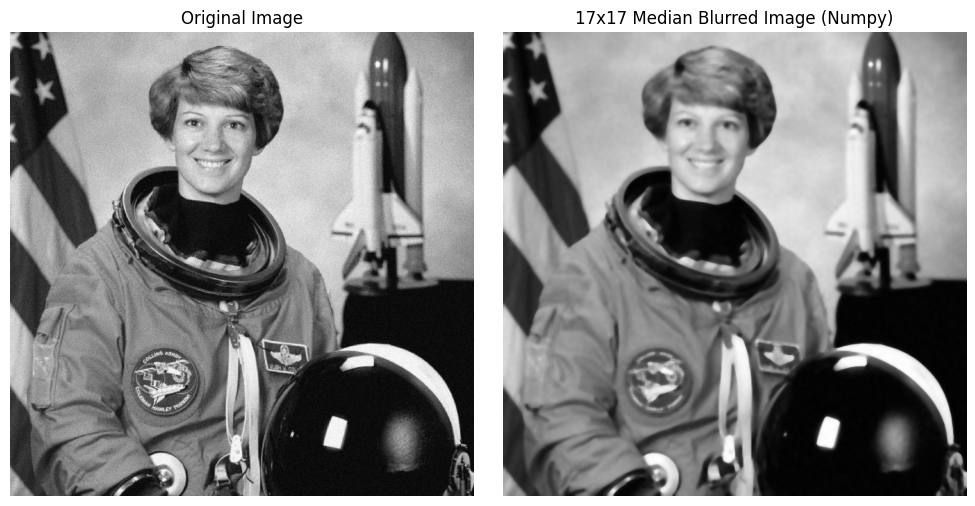

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt

def median_blur(image, kernel_size):
    # 커널 크기는 홀수여야 함
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")
    
    # 이미지 높이, 너비, 채널 수 확인
    if len(image.shape) == 2:
        image = image[:, :, np.newaxis]  # 그레이스케일 이미지를 3차원으로 변환
    
    height, width, channels = image.shape

    # 패딩 적용 (반사 패딩 사용)
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='reflect')

    # 출력 이미지 초기화
    output_image = np.zeros_like(image)

    # 각 픽셀에 대해 미디언 필터 적용
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                # 커널 영역 추출
                kernel = padded_image[y:y + kernel_size, x:x + kernel_size, c]
                # 커널의 중앙값을 계산하여 출력 이미지에 할당
                output_image[y, x, c] = np.median(kernel)
            pass
        pass
    pass
    
    # 채널이 1개인 경우, 2차원으로 변환
    if output_image.shape[2] == 1:
        output_image = output_image[:, :, 0]
    
    return output_image
pass

# 이미지 불러오기
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 미디언 블러 적용
ks = kernel_size = 17  # 커널 사이즈 (홀수여야 함)
blurred_image = median_blur(image, kernel_size)

# 원본 이미지와 미디언 블러 적용된 이미지 비교 출력
plt.figure(figsize=(10, 5))

# 원본 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title('Original Image')
plt.axis('off')

# 미디언 블러링된 이미지 출력
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap="gray")
plt.title(f'{ks}x{ks} Median Blurred Image (Numpy)')
plt.axis('off')

plt.tight_layout()
plt.show()